<a href="https://colab.research.google.com/github/User-Galih/capstone-project-bengkod/blob/main/Capstone_Project_14359.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive


# Mount Google Drive
drive.mount('/content/drive')

# Load dataset dari Google Drive
file_path = '/content/drive/MyDrive/Semester 6/BengKod/ObesityDataSet.csv'  # Sesuaikan dengan lokasi file di Google Drive
df = pd.read_csv(file_path)

Mounted at /content/drive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [5]:
# Menampilkan semua nilai unik dari semua kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    #Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Kolom: Age
Nilai unik:
['21' '23' '27' ... '22.524036' '24.361936' '23.664709']
Total nilai unik: 1394
Jumlah data kosong (NaN): 14, jumlah '?' sebagai missing: 8

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: Height
Nilai unik:
['1.62' '1.52' '1.8' ... '1.752206' '1.73945' '1.738836']
Total nilai unik: 1562
Jumlah data kosong (NaN): 12, jumlah '?' sebagai missing: 10

Kolom: Weight
Nilai unik:
['64' '56' '77' ... '133.689352' '133.346641' '133.472641']
Total nilai unik: 1518
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 8

Kolom: CALC
Nilai unik:
['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
Total nilai unik: 5
Jumlah data kosong (NaN): 5, jumlah '?' sebagai missing: 15

Kolom: FAVC
Nilai unik:
['no' 'yes' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 11, jumlah '?' sebagai missing: 11

Kolom: FCVC
Nilai unik:
['2' '3' '1' nan '?' '8.148992744163786' '8.42397392777979

In [6]:
# 1. Konversi kolom yang seharusnya numerik
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')  # Konversi ke numerik, ganti error jadi NaN


In [7]:
# 3. Tampilkan beberapa baris pertama untuk memastikan konversi tipe data berhasil
print("Beberapa baris pertama dari dataset:")
print(df.head())

Beberapa baris pertama dari dataset:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

 

In [8]:
# 4. Informasi umum dataset
print("\nInformasi Umum Dataset:")
print(df.info())


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF      

In [9]:
# 5. Deskripsi data
print("\nDeskripsi Statistik Dataset:")
print(df.describe(include='all'))


Deskripsi Statistik Dataset:
                Age Gender       Height       Weight       CALC  FAVC  \
count   2089.000000   2102  2089.000000  2092.000000       2106  2100   
unique          NaN      3          NaN          NaN          5     3   
top             NaN   Male          NaN          NaN  Sometimes   yes   
freq            NaN   1056          NaN          NaN       1386  1844   
mean      24.717928    NaN     1.706623    88.608184        NaN   NaN   
std        8.391323    NaN     0.117700    36.154617        NaN   NaN   
min       14.000000    NaN     1.450000    39.000000        NaN   NaN   
25%       19.955257    NaN     1.630000    66.000000        NaN   NaN   
50%       22.814657    NaN     1.701284    83.000000        NaN   NaN   
75%       26.000000    NaN     1.770000   108.055736        NaN   NaN   
max      106.441252    NaN     2.853986   441.131078        NaN   NaN   

               FCVC          NCP   SCC SMOKE         CH2O  \
count   2093.000000  2089.000000

In [15]:
# 6. Cek keberadaan missing values
print("\nMissing Values:")
print(df.isnull().sum())
# 7. Cek data duplikat
print("\nJumlah Data Duplikat:")
print(df.duplicated().sum())
# 8. Cek nilai unik per kolom
for col in df.columns:
    print(f"\nKolom: {col}")
    print("Nilai unik:")
    print(df[col].unique())
    print(f"Total nilai unik: {df[col].nunique(dropna=True)}")


    #Menampilkan jumlah NaN dan ? (missing values)
    print(f"Jumlah data kosong (NaN): {df[col].isna().sum()}, jumlah '?' sebagai missing: {(df[col] == '?').sum()}")



Missing Values:
Age                               22
Gender                             9
Height                            22
Weight                            19
CALC                               5
FAVC                              11
FCVC                              18
NCP                               22
SCC                               10
SMOKE                              5
CH2O                              15
family_history_with_overweight    13
FAF                               19
TUE                               15
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Data Duplikat:
18

Kolom: Age
Nilai unik:
[21.       23.       27.       ... 22.524036 24.361936 23.664709]
Total nilai unik: 1393
Jumlah data kosong (NaN): 22, jumlah '?' sebagai missing: 0

Kolom: Gender
Nilai unik:
['Female' 'Male' '?' nan]
Total nilai unik: 3
Jumlah data kosong (NaN): 9, jumlah '?' sebagai missing: 13

Kolom: H

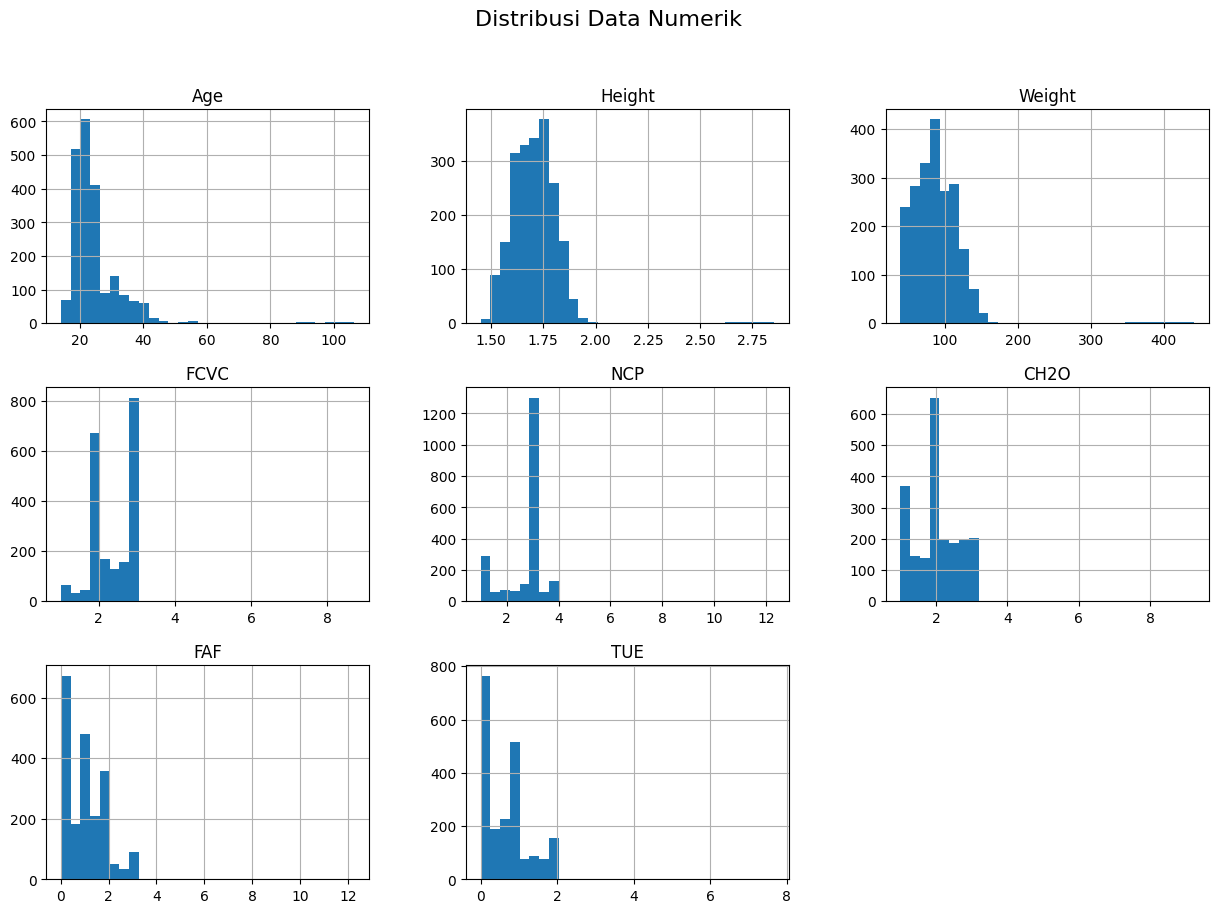

In [16]:
# 9. Visualisasi distribusi data numerik
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribusi Data Numerik", fontsize=16)
plt.show()

<ipython-input-20-42fcc37abd72>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='NObeyesdad', palette='Set2')


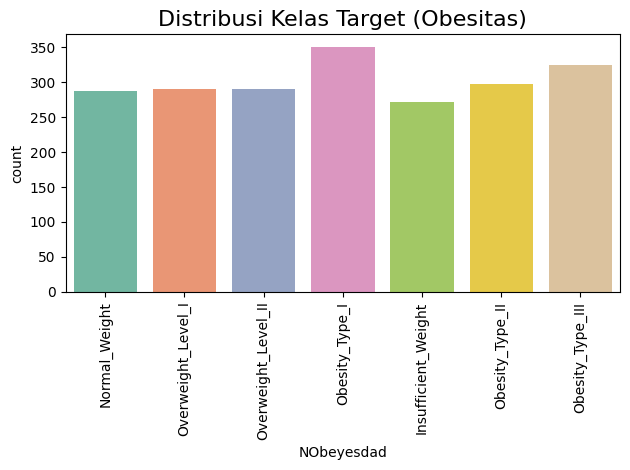

In [20]:
# 10. Visualisasi distribusi kategori target (NObeyesdad)
sns.countplot(data=df, x='NObeyesdad', palette='Set2')
plt.title('Distribusi Kelas Target (Obesitas)', fontsize=16)
plt.xticks(rotation=90)  # Rotasi label menjadi vertikal
plt.tight_layout()  # Untuk memastikan layout tidak terpotong
plt.show()


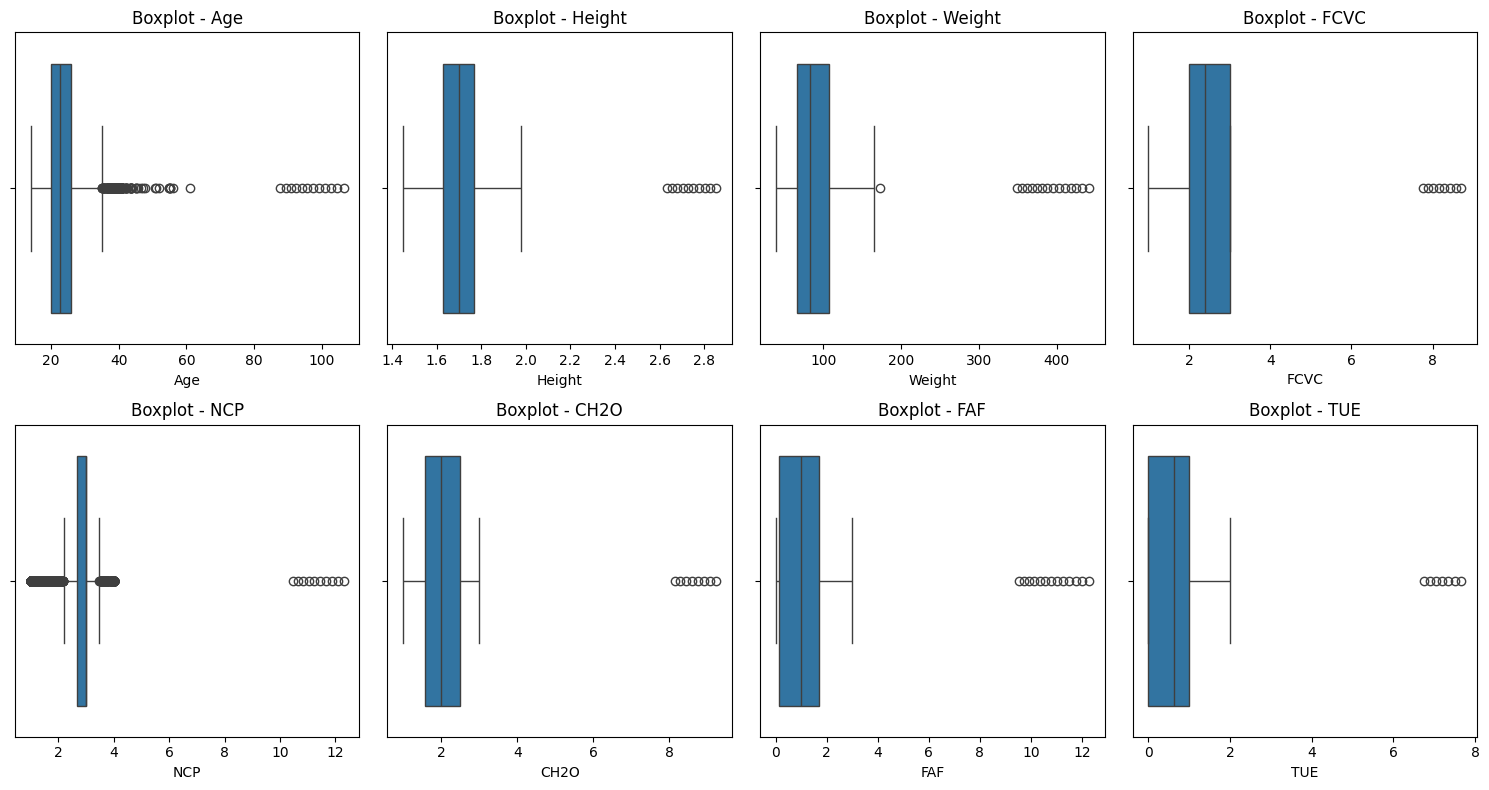

In [21]:
# 11. Deteksi outlier menggunakan boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()

In [22]:
# 12. Keseimbangan Data - Perbandingan jumlah tiap kategori target
print("\nKeseimbangan Data (NObeyesdad):")
print(df['NObeyesdad'].value_counts())


Keseimbangan Data (NObeyesdad):
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64
